# Librerias

In [1]:
def importLibrerias():
    '''Librerias correspondientes para el algoritmo Árbol de Decisión, definiciones de las librerías visita el siguiente enlace: https://docs.python.org/es/3.8/tutorial/index.html'''
import pandas 
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
print(importLibrerias.__doc__)
print(importLibrerias())

Librerias correspondientes para el algoritmo Árbol de Decisión, definiciones de las librerías visita el siguiente enlace: https://docs.python.org/es/3.8/tutorial/index.html
None


# Dataset

In [2]:
'''Carga y lectura del dataset Titanic mediante la libreía Pandas '''
df = pandas.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Reemplazo de valores

In [3]:
def reemplazoValores():
    '''Reemplazo de valores alfanuméricos del dataset en numéricos'''
print(reemplazoValores.__doc__)
d1 = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(d1)
d2 = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].map(d2)
print(df)
print(reemplazoValores())

Reemplazo de valores alfanuméricos del dataset en numéricos
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                         

# Careacterísticas o entradas y objetivo o salida

In [4]:
'''Características seleccionadas para el modelamiento'''
features = ['Sex', 'Age', 'SibSp','Embarked','Pclass']
X = df[features]

In [5]:
'''El objetivo (y) es la columna con los valores que intentamos predecir'''
y = df['Survived']

In [6]:
'''Transformación de valores NaN'''
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

C:\Users\Xiomara Ordoñez\AppData\Local\Temp\ipykernel_10068\4016638006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


## Impresión de datos

In [7]:
def Data():
    '''Impresión de verificación de que los datos ya estén de forma númerica '''
print(Data.__doc__)
print(X, y, sep='\n\n')
print(Data())

Impresión de verificación de que los datos ya estén de forma númerica 
     Sex   Age  SibSp  Embarked  Pclass
0      0  22.0      1       2.0       3
1      1  38.0      1       0.0       1
2      1  26.0      0       2.0       3
3      1  35.0      1       2.0       1
4      0  35.0      0       2.0       3
..   ...   ...    ...       ...     ...
886    0  27.0      0       2.0       2
887    1  19.0      0       2.0       1
888    1   0.0      1       2.0       3
889    0  26.0      0       0.0       1
890    0  32.0      0       1.0       3

[891 rows x 5 columns]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
None


# Árbol de Decisión

In [8]:
''''Contrucción de un clasificador de árbol de decisión a partir del conjunto de entrenamiento '''
dtree = DecisionTreeClassifier(max_leaf_nodes=7,random_state=0)

## Entrenamiento del modelo

In [9]:
dtree = dtree.fit(X, y)

### Guardar el árbol de decisión

In [10]:
'''Árbol de decisiones Guardado como imagen'''
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


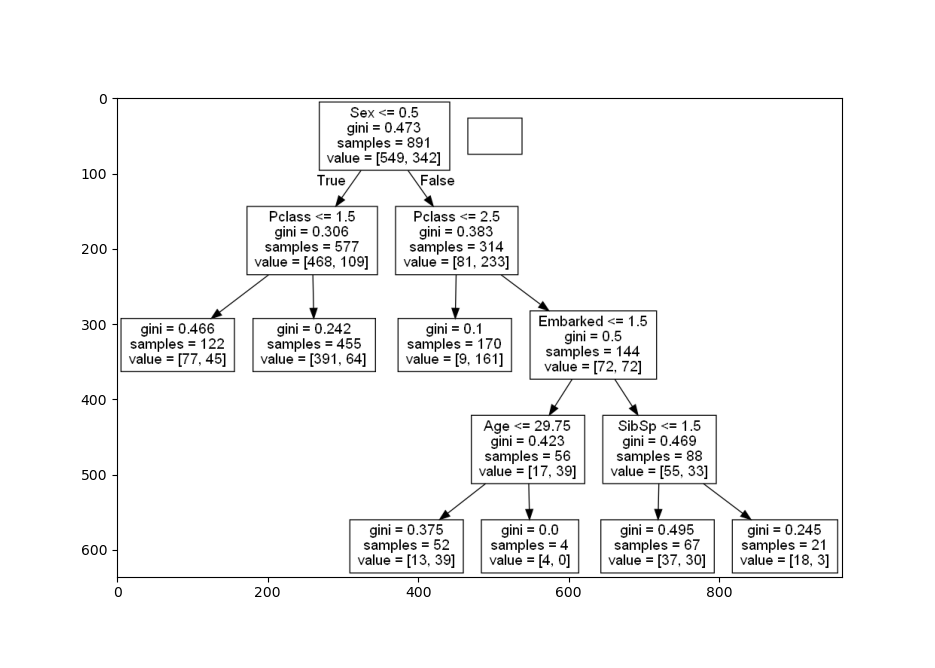

In [11]:
'''Visualización del Árbol de decisión'''
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# División del conjunto de datos

In [12]:
def division():
    '''Se divide 70% para entrenamiento y 30% para prueba
    X_train con 623 registros para entrenar
    y_train con 268 las “etiquetas” de los resultados esperados de X_train
    X_test con 623 registros para test
    y_test con 268 las “etiquetas” de los resultados de X_test'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
print(division.__doc__)
print(division())

Se divide 70% para entrenamiento y 30% para prueba
    X_train con 623 registros para entrenar
    y_train con 268 las “etiquetas” de los resultados esperados de X_train
    X_test con 623 registros para test
    y_test con 268 las “etiquetas” de los resultados de X_test
None


# Predicción del modelo

In [13]:
def prediccion():
    '''Predeccion a (y) para la prueba del dataset'''
    y_pred = dtree.predict(X_test)
    return(y_pred)
print(prediccion.__doc__)
print(prediccion())

Predeccion a (y) para la prueba del dataset
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0]


## Métricas

In [14]:
'''Exactitud: con qué frecuencia es correcto el clasificador'''
print("Exactitud: ", metrics.accuracy_score(y_test, prediccion()))

'''Presción: porcentaje de tuplas positivas están etiquetados como tales'''
print("Presicion: ", metrics.precision_score(y_test, prediccion()))

'''Sensibilidad: que porcentaje de tuplas positivas están etiquetados como tales'''
print("Sensibilidad ", metrics.recall_score(y_test, prediccion()))

Exactitud:  0.7947761194029851
Presicion:  0.88
Sensibilidad  0.4731182795698925


# Matriz de confusión

In [15]:
'''Matriz de confusión'''
confusion_matrix(y_test, prediccion())

array([[169,   6],
       [ 49,  44]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


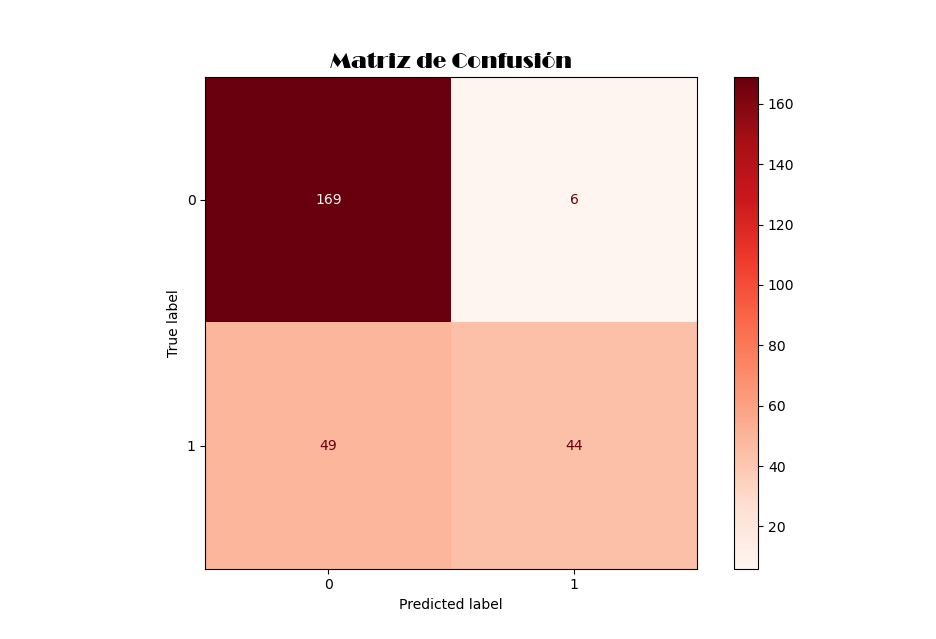

In [16]:
plot_confusion_matrix(dtree, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Matriz de Confusión", 
          position=(0.5, 0.9),
          fontdict={'family': 'Broadway',
                    'weight': 'bold',
                    'size': 16})
plt.show()

# Cálculos para la Matriz de confusión con Operaciones matemáticas Operaciones

In [17]:
# Variables para las operaciones matemáticas
TN = 169
FP = 6
FN = 49
TP = 44
REAL_SI = FN + TP
NO_REAL = TN + FP
PREDICTED_SI = FP + TP
TOTAL = TN+FP+FN+TP

In [18]:
# Accurancy (exactitud): (TP + TN) / total 
Exactitud = (TP + TN)/TOTAL
print(Exactitud)

0.7947761194029851


In [19]:
#Tasa de clasificación errónea: en general, ¿con qué frecuencia es incorrecta?: (FP + FN) / total 
TasaError = (FP + FN) / TOTAL
print((FP + FN) / TOTAL)

0.20522388059701493


In [20]:
#Tasa de verdaderos positivos: cuando en realidad es sí, ¿con qué frecuencia predice que es real sí?: TP / real sí
Sensibilidad = TP / REAL_SI
print(Sensibilidad)

0.4731182795698925


In [21]:
#Tasa de falsos positivos: cuando en realidad es no, ¿con qué frecuencia predice que sí? : FP / no real 
FalsosPositivos = FP / NO_REAL 
print(FalsosPositivos)

0.03428571428571429


In [22]:
# Tasa de verdadero negativo: cuando en realidad es no, ¿con qué frecuencia predice que no? : TN / número real
Especificidad = TN / NO_REAL
print(Especificidad)

0.9657142857142857


In [23]:
# Precisión: cuando predice que sí, ¿con qué frecuencia es correcto :TP / predicho sí =
Precision = TP / PREDICTED_SI
print(Precision)

0.88
